<a href="https://colab.research.google.com/github/Babatunde13/30-days-of-ML/blob/master/30DaysOfML/Day19/Babatunde/First_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow import  keras
from tensorflow.keras.utils import  to_categorical
import numpy as np

In [0]:
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

labels = [
          'T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
          ]

In [4]:
y_train[0]

9

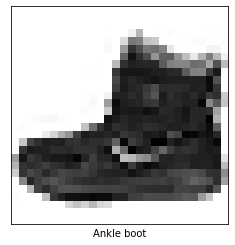

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.xlabel(labels[y_train[0]])
plt.xticks([])
plt.yticks([])
plt.show()

## **Showing The First 12 Images before Normalization**

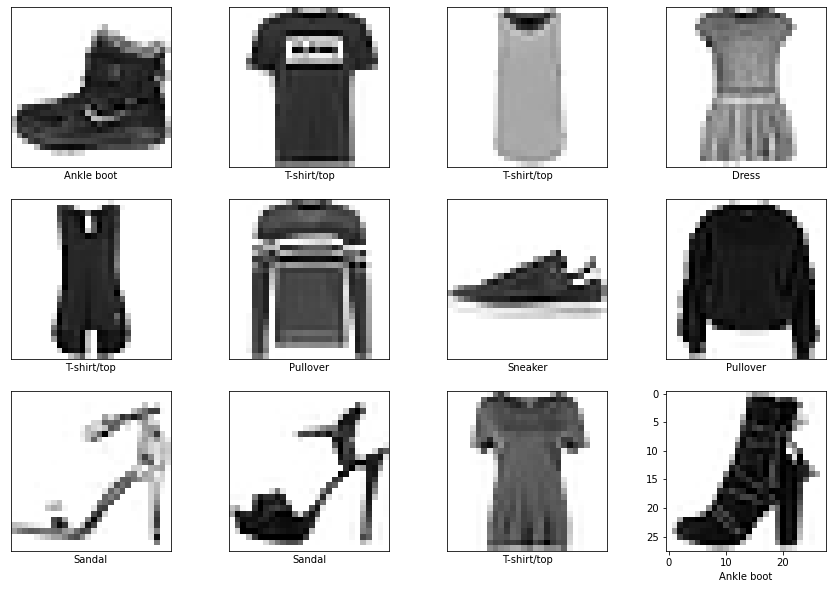

In [6]:
plt.figure(figsize=(15, 10))
for i in range(12):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(labels[y_train[i]])

plt.show()

**Normalizing Data**

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# **Checking Out The First 12 images after Normalization**

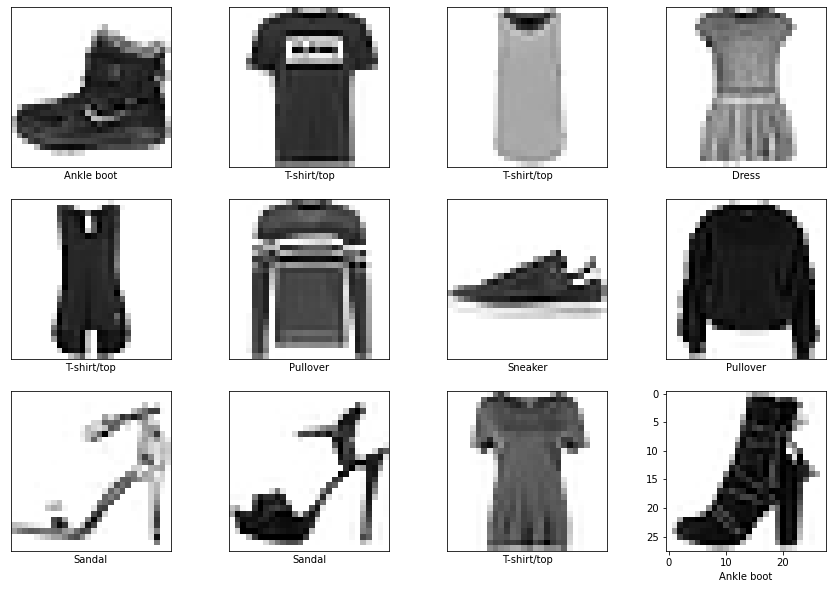

In [8]:
plt.figure(figsize=(15, 10))
for i in range(12):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(labels[y_train[i]])

plt.show()

# **Model Building And Compiling**

In [0]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.InputLayer(input_shape=784))
model.add(keras.layers.Dense(784, activation='relu'))
model.add(keras.layers.Dense(360, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

# model.summary()

In [10]:
model.build(input_shape=(60000, 784))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                multiple                  615440    
_________________________________________________________________
dense_1 (Dense)              multiple                  282600    
_________________________________________________________________
dense_2 (Dense)              multiple                  3610      
Total params: 901,650
Trainable params: 901,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train.shape

(60000, 10)

In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 5s 77ms/step - loss: 0.6918 - accuracy: 0.7717
Epoch 2/10
60/60 [==============================] - 5s 77ms/step - loss: 0.4108 - accuracy: 0.8547
Epoch 3/10
60/60 [==============================] - 5s 78ms/step - loss: 0.3627 - accuracy: 0.8714
Epoch 4/10
60/60 [==============================] - 5s 77ms/step - loss: 0.3375 - accuracy: 0.8791
Epoch 5/10
60/60 [==============================] - 5s 78ms/step - loss: 0.3150 - accuracy: 0.8864
Epoch 6/10
60/60 [==============================] - 5s 77ms/step - loss: 0.2943 - accuracy: 0.8928
Epoch 7/10
60/60 [==============================] - 5s 77ms/step - loss: 0.2800 - accuracy: 0.8980
Epoch 8/10
60/60 [==============================] - 5s 79ms/step - loss: 0.2565 - accuracy: 0.9059
Epoch 9/10
60/60 [==============================] - 5s 77ms/step - loss: 0.2518 - accuracy: 0.9080
Epoch 10/10
60/60 [==============================] - 5s 78ms/step - loss: 0.2422 - accuracy: 0.9109


# **Model Evaluation**

In [24]:
print('Training evaluation', model.evaluate(X_train, y_train))
print('Testing evaluation', model.evaluate(X_test, y_test))
loss, eval_test = model.evaluate(X_test, y_test)
print('Loss =', loss, 'and accuracy =', eval_test)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2365 - accuracy: 0.9121
Training evaluation [0.23653973639011383, 0.9120500087738037]
313/313 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8828
Testing evaluation [0.334164559841156, 0.8827999830245972]
313/313 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8828
Loss = 0.334164559841156 and accuracy = 0.8827999830245972


# **Making Predictions**




In [0]:
import numpy as np
preds = np.argmax(model.predict(X_test), axis=1)

In [26]:
print(preds[:10])
# print(model.predict(X_test)[1:5])
np.argmax(y_test, axis=1)[:10]

[9 2 1 1 6 1 4 6 5 7]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [27]:
np.argmax(y_train[0])

9

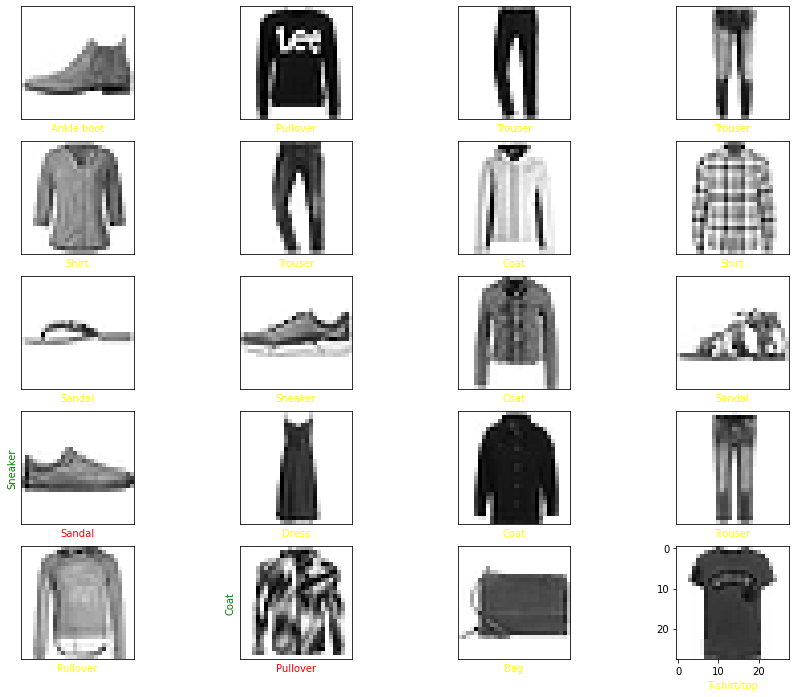

In [28]:
plt.figure(figsize=(15, 12))
for i in range(20):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5, 4, i+1)
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  if labels[np.argmax(y_test[i])] == labels[preds[i]]:
    plt.xlabel(labels[preds[i]], color='yellow')
  else:
    plt.xlabel(labels[preds[i]], color='red')
    plt.ylabel(labels[np.argmax(y_test[i])], color='green')


plt.show()